In [10]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The following notebook asseses statistical arbitrage behavior relative to particular long-short reversion investments.

Commentary associated with the analysis can be found here:
https://github.com/dancardella/K2-Curriculum/blob/master/CURRICULUM/Regression/Regression_Assignment.md         

In [ ]:
db = sqlite3.connect("prices_csv.sqlite")
fundamentals = pd.read_sql_query("SELECT * FROM Fundamental_Factors", db)

In [ ]:
db = sqlite3.connect("prices_csv.sqlite")
stats1 = pd.read_sql_query("SELECT * FROM stats1", db)

In [ ]:
stats1.head()
stats1.columns
days_diff = stats1['Days_diff']
del(stats1['Days_diff'])
stats1.rename(columns={'Transaction_Price':'Price', 'Transaction_Volume':'Volume',
       'Transaction_$' : 'Amount', 'Comp':'Short'}, inplace = True)

In [ ]:
db = sqlite3.connect("prices_csv.sqlite")
stats2 = pd.read_sql_query("SELECT * FROM stats2", db)

In [ ]:
db = sqlite3.connect("prices_csv.sqlite")
stats3 = pd.read_sql_query("SELECT * FROM stats3", db)

In [ ]:
stats3.columns
stats3_correlation = stats3['Correlation']
del stats3['Correlation']
stats3.head()

In [ ]:
# Re-indexing Stats
cum_vol_and_prices = pd.concat([prices_ratio,cum_vol], axis =1)
stats_combined = pd.concat([stats1,stats2, stats3])
del(stats_combined['Day Prior'])
stats_combined = stats_combined.reindex_axis(['Stock', 'Date', 'Price', 'Volume', 'Amount', 'Short', 'Adj_Date',
       'Week_day', 'Day_Prior', 'Recent_Date', 'Day_Prior_Deal_Ratio'], axis=1)

In [ ]:
# Setting a few values
stats_combined.loc['PE', 'Price'] = '21.37'
stats_combined.loc['PE', 'Amount']= '438.08'
stats_combined.loc['PE','Day_Prior_Deal_Ratio'] = '0.94767184'

stats_combined.loc['SRC', 'Price'] = '11.50'
stats_combined.loc['SRC', 'Amount']= '34.5'
stats_combined.loc['SRC','Day_Prior_Deal_Ratio'] = '1.003'

In [ ]:
stats_combined = pd.read_csv("combined_stats.csv")

In [ ]:
db = sqlite3.connect("prices_csv.sqlite")
stats_combined.to_sql('stats_combined2', db)

In [ ]:
stats_combined.index = stats_combined['Stock']
del(stats_combined['Stock'])
stats_combined

In [6]:
import pandas as pd
fundamentals = pd.read_csv("Regression_Project_Fundamental_Factors.csv")

fundamentals.index = fundamentals['Company']
del(fundamentals['Company'])

In [ ]:
db = sqlite3.connect("prices_csv.sqlite")
fundamentals.to_sql('fundamentals', db)

In [ ]:
for i, j in added_mcaps.items():
    fundamentals.loc[i, 'market_cap'] = j
for i, j in added_ebitdas.items():
    fundamentals.loc[i, 'ebitda '] = j    

In [ ]:
dpdr=stats_combined['Day_Prior_Deal_Ratio']

In [ ]:
fundamentals['pricing_ratio'] = dpdr

In [ ]:
db = sqlite3.connect("prices_csv.sqlite")
cum_vol_prices1 = pd.read_sql_query("SELECT * FROM cum_vol_and_comps1", db)

In [ ]:
db = sqlite3.connect("prices_csv.sqlite")
cum_vol_prices2 = pd.read_sql_query("SELECT * FROM cum_vol_and_comps2", db)

In [ ]:
db = sqlite3.connect("prices_csv.sqlite")
cum_vol_prices3 = pd.read_sql_query("SELECT * FROM cum_vol_and_prices3", db)

In [ ]:
cum_vol_prices1.to_csv("cum_vol_prices1.csv")
cum_vol_prices2.to_csv("cum_vol_prices2.csv")
cum_vol_prices3.to_csv("cum_vol_prices3.csv")

In [ ]:
db = sqlite3.connect("prices_csv.sqlite")
fundamentals = pd.read_sql_query("SELECT * FROM fundamentals", db)

In [608]:
spread_ratios = pd.read_csv("spread_ratios.csv")
spread_ratios.replace('', np.nan, inplace=True)
spread_ratios.replace(' ', np.nan, inplace=True)
spread_ratios.index= spread_ratios['Vol_index']
del(spread_ratios['Vol_index'])
spread_ratios2 = spread_ratios.T.sort_index()
spread_ratios= spread_ratios2.T
spread_ratios.head()

,ADMS,ADPT,AKS,AM,AR,ASC,BNCN,CARA,COG,CPE,...,SRC,STKL,SWN,SYRG,TRVN,TTI,TTOO,TXMD,WGP,ZGNX
Vol_index,,,,,,,,,,,,,,,,,,,,,
0.0,0.76,0.85,0.90,0.86,0.99,0.87,1,1.03,0.97,1.018,...,0.96,1.05,0.91,1.02,1.13,0.88,1.07,1.06,0.88,1.01
0.1,0.76,0.85,0.90,0.86,0.99,0.87,1,1.03,0.97,1.018,...,0.96,1.05,0.91,1.02,1.13,0.88,1.07,1.06,0.88,1.01
0.2,0.76,0.85,0.90,0.86,0.99,0.87,1,1.03,0.97,1.018,...,0.96,1.05,0.91,1.02,1.13,0.88,0.96,1.06,0.88,0.93
0.3,0.76,0.85,0.90,0.86,0.99,0.87,1,1.03,0.97,1.018,...,0.96,1.06,0.91,1.06,1.13,0.88,0.89,1.06,0.88,0.93
0.4,0.76,0.85,0.90,0.86,0.99,0.87,1,1.03,0.97,1.018,...,0.96,1.06,0.91,1.06,1.13,0.88,0.89,1.06,0.88,0.93


In [609]:
for i in spread_ratios.index:
    for col in spread_ratios.columns:
        try:
            tmp = float(spread_ratios.ix[i][col])
        except Exception:
            print(i, col)

In [610]:
for col in spread_ratios.columns:
    spread_ratios[col]= spread_ratios[col].astype('float')    

In [ ]:
spread_ratios.mean(axis=1)

In [ ]:
#  GRAPHING spread_ratios MEAN VALUES 
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(spread_ratios.mean(axis=1))

In [ ]:
db = sqlite3.connect("prices_csv.sqlite")
prices = pd.read_sql_query("SELECT * FROM prices", db)

In [ ]:
prices.head()
prices.index=prices['Date']
del(prices['index'])

In [ ]:
# ADDED A FEW COMPANIES
prices_added = pd.read_csv('prices_added.csv')

In [ ]:
prices_added = prices_added.T
prices_added_no_date = prices_added.T
prices_added_t = prices_added_no_date.T              
prices_added_t.head()
prices_added_t.index = prices.index
del prices_added_t['Date']
prices_added_t.index

In [ ]:
combined = pd.concat([prices,prices_added_t], axis =1)
combined= combined[:235]
combined.head()

In [ ]:
db = sqlite3.connect("prices_csv.sqlite")
prices = pd.read_sql_query("SELECT * FROM prices3", db)

In [ ]:
db = sqlite3.connect("prices_csv.sqlite")
prices3.to_sql('prices3.csv', db)

In [ ]:
pricess.to_csv('prices2.csv')
prices3.to_csv('prices3.csv')

In [ ]:
# Ran Correlations in R (using 'cor' function) and uploading here
cor1= pd.read_csv('prices1_correlations.csv')
cor2= pd.read_csv('prices2_correlations.csv')
cor3= pd.read_csv('prices3_correlations.csv')

In [ ]:
cor1.index = cor1['Unnamed: 0']
del(cor1['Unnamed: 0'])
cor1.head()

In [ ]:
db = sqlite3.connect("prices_csv.sqlite")

stats1= pd.read_sql_query("SELECT * FROM stats1", db)
stats2 = pd.read_sql_query("SELECT * FROM stats2", db)
stats3 = pd.read_sql_query("SELECT * FROM stats3", db)

In [ ]:
stats1.index= stats1['Stock']
del (stats1['Stock'])

In [ ]:
stats1.head()
#stats1['Comp']

In [ ]:
comp_bucket1 = {}
for i in stats1.index:
    comp1 = stats1.loc[i,'Comp']   
    comp_bucket1[i] = cor1.loc[i, comp1]
comp_bucket1

In [ ]:
combined_correlation = {**comp_bucket1, **comp_bucket2, **comp_bucket3}

In [ ]:
comp_df = pd.DataFrame.from_dict(combined_correlation, orient="index")

In [ ]:
spread_ratios.head()

In [ ]:
fundamentals['Comp_Cor'] = comp_df[0]

In [ ]:
db = sqlite3.connect("prices_csv.sqlite")
fundamentals.to_sql('fundamentals_', db)
fundamentals.head()

In [8]:
db = sqlite3.connect("prices_csv.sqlite")
#fundamentals.to_sql('Fundamental_Factors', db)
fundamentals = pd.read_sql_query("SELECT * FROM fundamentals_", db)

In [13]:
fundamentals.index= fundamentals['Company']
del(fundamentals['Company'])

In [ ]:
Day_Prio_DR = pd.read_csv('Day_Prio_DR.csv')

In [ ]:
Day_Prio_DR.index= Day_Prio_DR['Stock']
del (Day_Prio_DR['Stock'])

In [ ]:
fundamentals['Company']= Day_Prio_DR

In [ ]:
fundamentals = fundamentals.rename(columns={'Day_Prior_DR': 'day_prior_dr'})
fundamentals = fundamentals.rename(columns={'Comp_Cor': 'comp_cor'})

In [ ]:
db = sqlite3.connect("prices_csv.sqlite")
spread_ratios.to_sql('spread_ratios', db)

In [ ]:
spread_ratios.head()

In [ ]:
ror = (spread_ratios.loc[spread_ratios.index == 3.8].divide(spread_ratios.loc[spread_ratios.index == 5.1].values)-1)*100
ror.mean(axis=1)

In [ ]:
fundamentals['ror'] = ror.T
fundamentals.head()

In [ ]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(fundamentals, figsize=[20,20])

#plt.savefig("Scatter_Matrix.png")

In [ ]:
import seaborn as sns
fun_correlation= fundamentals_masked.corr()
plt.figure(figsize=(10,10))
sns.heatmap(fun_correlation,vmax=1, square =True, annot= True, cmap="viridis")
plt.title("Correlation")

plt.savefig("Feature_Correlation.png")

In [539]:
spread_ratios_masked= spread_ratios.T.loc[fundamentals_masked.index.tolist(), :]
spread_ratios_masked= spread_ratios_masked.T
spread_ratios_masked.head()

Company,AKS,AM,AR,COG,CPE,DVN,EQT,ESV,FLXN,FOXF,GPOR,MTDR,NDRM,O,QEP,QTWO,SWN,WGP
Vol_index,,,,,,,,,,,,,,,,,,
0.0,0.9,0.86,0.99,0.97,1.018,1.01,0.96,NaN,0.9,0.91,0.93,1.03,0.96,0.98,0.82,1.07,0.91,0.88
0.1,0.9,0.86,0.99,0.97,1.018,1.01,0.96,NaN,0.9,0.91,0.93,1.03,0.96,0.98,0.82,1.07,0.91,0.88
0.2,0.9,0.86,0.99,0.97,1.018,1.01,0.96,NaN,0.9,0.91,0.93,1.03,0.96,0.98,0.82,1.07,0.91,0.88
0.3,0.9,0.86,0.99,0.97,1.018,1.01,0.96,NaN,0.9,0.91,0.93,1.03,0.96,0.98,0.82,1.07,0.91,0.88
0.4,0.9,0.86,0.99,0.97,1.018,1.01,0.96,NaN,0.9,0.91,0.93,1.03,0.96,0.98,0.82,1.07,0.91,0.88


In [ ]:
#normalized_spread_to_six =(spread_to_six_mean-spread_to_six_mean.mean())/spread_to_six_mean_std
plt.plot(normalized_spread_to_six)

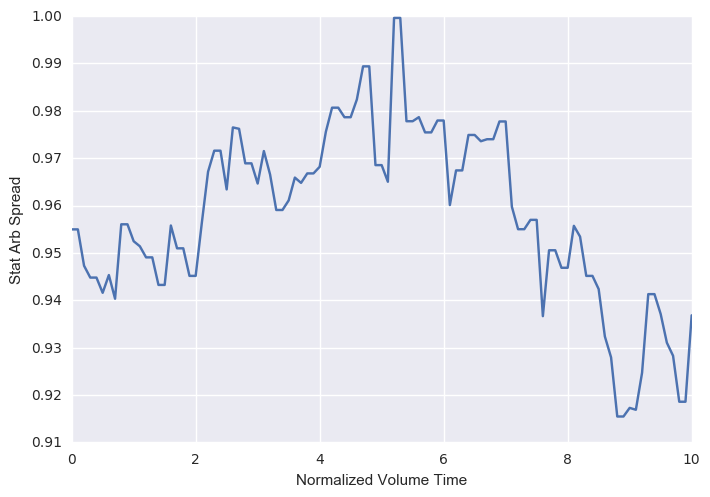

In [535]:
plt.plot(spread_ratios.mean(axis=1))
plt.xlabel("Normalized Volume Time")
plt.ylabel("Stat Arb Spread")

#plt.savefig("Mean_Spread_Ratio.png")

In [ ]:
spread_to_six= spread_ratios[:6.0]
spread_to_six_mean= spread_to_six.mean(axis=1)
spread_to_six_mean_std= spread_to_six_mean.std()

In [783]:
max_ratio = spread_ratios[setup:unwind].max(axis=0)
max_ratio[max_ratio>1] =1
ror_window_t= ror_window.T
setup_ratio_series = setup_ratio[setup]

maxed_out_ror = (1/setup_ratio_series[max_ratio==1]-1)*100
maxed_out_ror = pd.DataFrame(maxed_out_ror)

ror_window_t.loc[maxed_out_ror.index] = maxed_out_ror

In [638]:
setup= 2.0
unwind= 6.0

setup_ratio= spread_ratios[setup:setup].T
fundamentals['setup_ratio'] = setup_ratio

In [786]:
def vol_window(setup, unwind):
    ror_window = (spread_ratios.loc[spread_ratios.index == unwind].divide(spread_ratios.loc[spread_ratios.index == setup].values)-1)*100
    max_ratio = spread_ratios[setup:unwind].max(axis=0)
    max_ratio[max_ratio>1] =1
    ror_window_t= ror_window.T
    setup_ratio_series = setup_ratio[setup]

    maxed_out_ror = (1/setup_ratio_series[max_ratio==1]-1)*100
    maxed_out_ror = pd.DataFrame(maxed_out_ror)

    ror_window_t.loc[maxed_out_ror.index] = maxed_out_ror    
    ror_window= ror_window_t.T
    return (ror_window)

ror_window= vol_window(setup, unwind)      

,ADMS,ADPT,AKS,AM,AR,ASC,BNCN,CARA,COG,CPE,...,SRC,STKL,SWN,SYRG,TRVN,TTI,TTOO,TXMD,WGP,ZGNX
Vol_index,,,,,,,,,,,,,,,,,,,,,
6.0,14.473684,-25.581395,6.666667,9.859155,1.010101,20.481928,-2.912621,-17.355372,3.092784,-2.248289,...,4.166667,14.942529,9.89011,-7.216495,-3.278689,2.040816,20.481928,-16.666667,1.010101,0.0


In [820]:
len(ror_window.T)
ror_window.T.sum()

Vol_index
6.0    99.133087
dtype: float64

In [ ]:
#setup_ratio= spread_ratios[setup:setup].T
fundamentals['setup_ratio'] = setup_ratio

In [827]:
ror_window
#fundamentals.head()

,ADMS,ADPT,AKS,AM,AR,ASC,BNCN,CARA,COG,CPE,...,SRC,STKL,SWN,SYRG,TRVN,TTI,TTOO,TXMD,WGP,ZGNX
Vol_index,,,,,,,,,,,,,,,,,,,,,
6.0,14.473684,-25.581395,6.666667,9.859155,1.010101,20.481928,-2.912621,-17.355372,3.092784,-2.248289,...,4.166667,14.942529,9.89011,-7.216495,-3.278689,2.040816,20.481928,-16.666667,1.010101,0.0


In [798]:
# SETTING ror_window
fundamentals['ror'] = ror_window.T
#fundamentals.to_csv('fundamentals.csv')
#fundamentals_masked.to_csv('fundamentals_masked.csv')

In [829]:
def fun_masking(market_cap,editda,day_prior_dr,comp_cor): 
    fundamentals_masked = fundamentals[fundamentals['comp_cor']>comp_cor]
    fundamentals_masked = fundamentals_masked[fundamentals_masked['ror'] !=0]
    fundamentals_masked = fundamentals_masked[fundamentals_masked['market_cap'] >market_cap]
    fundamentals_masked = fundamentals_masked[fundamentals_masked['editda'] >editda]
    fundamentals_masked = fundamentals_masked[fundamentals_masked['day_prior_dr'] <day_prior_dr]    
    return (fundamentals_masked)
fundamentals_masked= fun_masking(market_cap=.3,editda=-2,day_prior_dr=1,comp_cor=.7)
len(fundamentals_masked)

20

In [830]:
import statsmodels.api as sm
lm = sm.OLS.from_formula('ror ~ editda+day_prior_dr+comp_cor+setup_ratio', fundamentals_masked)
result = lm.fit()

In [831]:
# Not the best R^2 but about as expected...only day_prior_dr coeeficient statistically significant. 
# Conclusion: Try another model
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                    ror   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     6.585
Date:                Mon, 17 Apr 2017   Prob (F-statistic):            0.00338
Time:                        20:02:18   Log-Likelihood:                -56.169
No. Observations:                  19   AIC:                             122.3
Df Residuals:                      14   BIC:                             127.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       60.7553     43.532      1.396   

/Users/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


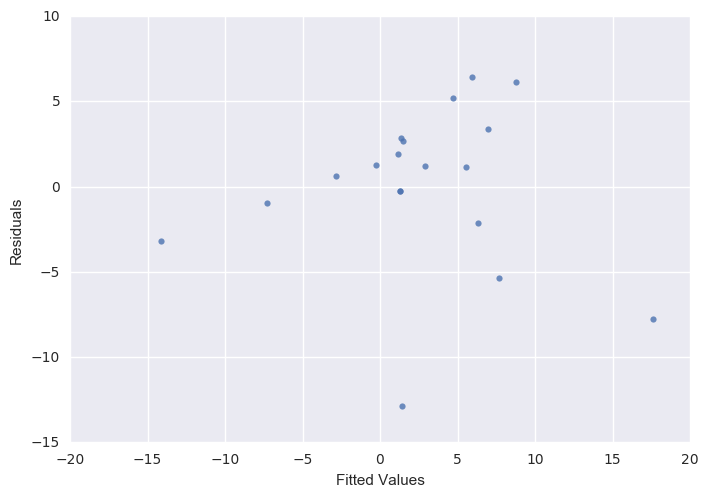

In [832]:
# Concern here with this trend ... I've got work to do here
fitted_values = pd.Series(result.fittedvalues, name="Fitted Values")
residuals = pd.Series(result.resid, name="Residuals")
sns.regplot(fitted_values, residuals, fit_reg=False)

In [802]:
fitted_values.sort_values()

Company
RLGT   -21.180680
NDRM   -16.372633
CARA   -16.278967
FLXN    -8.131588
CPE     -3.717675
AR       0.193043
O        0.217656
COG      0.782646
WGP      0.827213
PE       1.167014
GNCA     1.311310
MTDR     1.534783
GPOR     1.753017
EQT      2.917448
SABR     3.956013
SWN      5.247539
DVN      5.468997
AKS      5.819781
QTWO     7.221060
FOXF     8.447537
QEP      8.830123
HES      9.687249
ASC     12.560038
AM      20.617811
Name: Fitted Values, dtype: float64

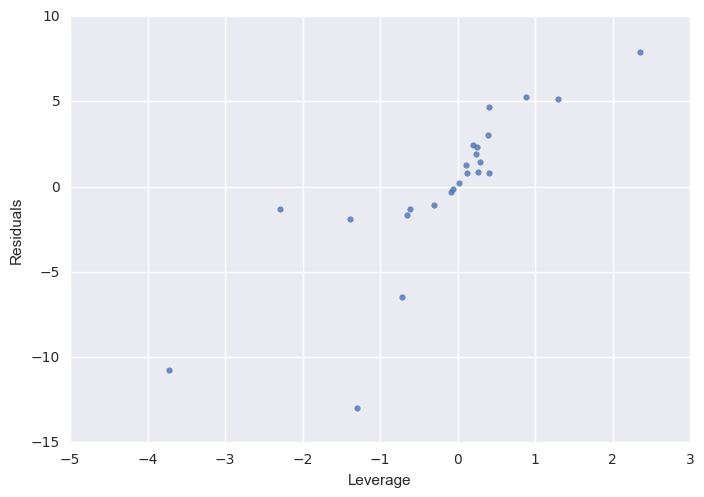

In [803]:
# At least one leverage point
from statsmodels.stats.outliers_influence import OLSInfluence
leverage = pd.Series(OLSInfluence(result).influence, name = "Leverage")
sns.regplot(leverage, residuals,  fit_reg=False)

Next Steps:
    1. Investigate the patter within the Residuals vs Fitted Values plot to determine explore model improvements
    2. Add additional observations (n)
    3. Refine Feature Selection dropping the non-statistically significant terms and adding others
    4. Detail Comments within this Notebook